In [1]:
import os, sys, random, shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import cv2


%matplotlib inline
from matplotlib import patches
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#!python train.py --img 416 --batch 16 --epochs 300 --data /content/drive/MyDrive/yolo_model/data.yaml --cfg models/yolov5m.yaml --weights yolov5s.pt --project /content/drive/MyDrive/yolo_model


train: weights=yolov5s.pt, cfg=models/yolov5m.yaml, data=/content/drive/MyDrive/yolo_model/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/yolo_model, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 âœ…
YOLOv5 ðŸš€ v7.0-226-gdd9e338 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw

In [ ]:
import shutil
!if [ ! -d "yolov5" ]; then git clone 'https://github.com/ultralytics/yolov5.git'; fi
!sed -i 's/PyYAML>=5.3.1/PyYAML==5.4.1/g' ./yolov5/requirements.txt
shutil.copyfile('/content/drive/MyDrive/yolo_model/data.yaml', 'yolov5/data.yaml')
!sed -i 's/nc: 80/nc: 2/g' ./yolov5/models/yolov5m.yaml


In [ ]:
%cd yolov5
!pip install -r requirements.txt

In [ ]:
!pip install ultralytics

In [3]:
import os
print("Path to images exists:", os.path.exists('/content/drive/MyDrive/yolo_model/tobacco_yolo_format/images/valid/'))
print("Path to weights exists:", os.path.exists('/content/drive/MyDrive/yolo_model/exp/weights/best.pt'))

Path to images exists: True
Path to weights exists: True


In [ ]:
!python yolov5/detect.py --source /content/drive/MyDrive/yolo_model/tobacco_yolo_format/images/valid/ --weights '/content/drive/MyDrive/yolo_model/exp/weights/best.pt' \
--hide-labels --hide-conf --classes 1 --line-thickness 2 --save-txt


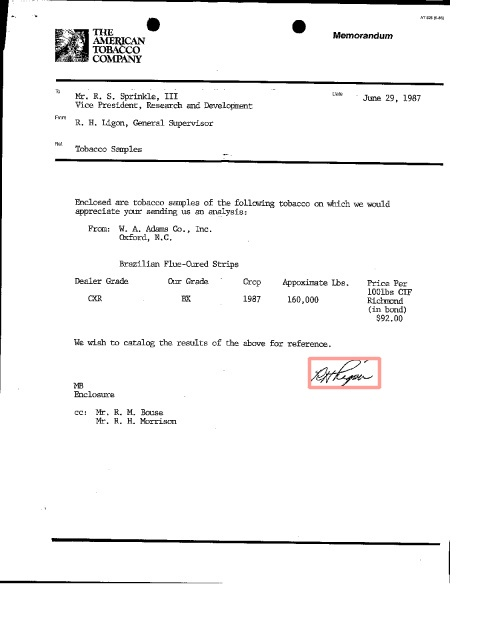

In [17]:
from IPython.display import Image, display

# Replace with the path of your output image
display(Image(filename='yolov5/runs/detect/exp2/zqc25f00_1.jpg'))

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 ðŸš€ 2023-10-5 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20856975 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


Bounding Boxes: [[     52.987      27.217      89.102      62.678     0.91509           0]
 [     309.22      358.45       378.7      387.22     0.84011           1]]
Displaying Cropped Image 0


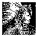

Displaying Cropped Image 1


In [61]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display




def load_model(weights_path):
    """
    Load the trained YOLO model.

    Parameters:
        weights_path (str): Path to the trained weights

    Returns:
        model: Loaded model
    """
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)
    return model

def detect_and_crop(image_path, model):
    """
    Perform object detection, crop the images, and yield them one by one.

    Parameters:
        image_path (str): Path to the input image
        model: Trained YOLO model

    Yields:
        PIL.Image: Cropped image
    """
    # Load and process the image
    img = Image.open(image_path)
    results = model(image_path)
    bboxes = results.xyxy[0].cpu().numpy()
    print(f"Bounding Boxes: {bboxes}")


    # Crop and yield each detected object
    for i, box in enumerate(bboxes):
        x1, y1, x2, y2 = box[:4].astype(float)
        cropped_img = img.crop((x1, y1, x2, y2))
        cropped_img.save(f"cropped_{i}.jpg")
        yield cropped_img


def display_image(image):
    display(image)


weights_path = '/content/drive/MyDrive/yolo_model/exp/weights/best.pt'

path = "/content/drive/MyDrive/yolo_model/tobacco_yolo_format/images/valid/zqc25f00_1.jpg"

model = load_model(weights_path)

# Process each cropped image
for i, cropped_image in enumerate(detect_and_crop(path, model)):
    print(f"Displaying Cropped Image {i}")
    display_image(cropped_image)

